![title](img.jpeg)

# SPEED DATING PROJECT

# Informations :

Ce dataset, basé sur du Speed Dating, est le résultat d'une expérience de la Columbia Business School aux U.S.A. , qui essaie de découvrir ce qui influence l'"Amour" à première vue.

Avec une durée de 4 minutes, on a demandé aux participants s'ils souhaiaient revoir les personnes qu'ils/elles ont rencontré durant les mini dates. Ils ont également été invités à évaluer leur partenaire et à partager leurs attentes et critères qui contribuent au "match" entre les deux.

Notre objectif est de trouver, grâce à des mécanismes ou caractéristiques des candidats, ce qui pourrait créer un déclic pour revoir la personne.

Nous avons décidé de donner brièvement un aperçu des moteurs structurels (sexe, âge, profession, origines/religions, et.) de cet événement puis nous concentrerons notre analyse des données sur :

- le groupe qui obtient au moins un match et une date
- quelles sont les raisons intérieures qui favorisent l'obtention d'un rendez-vous avec un match

### L'objectif premier de ce projet est de savoir si le côté religieux est un facteur important chez les candidats pour un second date.

# Useful downloading for our project : Plotly (visualisation) and important librairies

In [ ]:
!pip install plotly==4.9.0 -q

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score
import plotly.io as pio 

# Collecting Dataset 

In [79]:
speed_dating = pd.read_csv ('Speed_Dating_Data.csv', encoding='ISO-8859-1')

In [80]:
speed_dating.describe(include = 'all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [81]:
speed_dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

# 1. We gonna to clean our dataset. We want to keep only the variables that will be useful

In [82]:
speed_dating = speed_dating[['iid',
                             'gender',
                             'condtn',
                             'wave',
                             'round',
                             'pid',
                             'goal',
                             'match',
                             'int_corr',
                             'samerace',
                             'age_o',
                             'race_o',
                             'age',
                             'field_cd',
                             'race',
                             'imprace',
                             'imprelig',
                             'from',
                             'income',
                             'date',                                             
                             'go_out',
                             'career_c',
                             'dec',
                             'numdat_2',
                             'you_call',
                             'them_cal',
                             'date_3',
                             'attr1_3',
                             'sinc1_3',
                             'intel1_3',
                             'fun1_3',
                             'amb1_3',
                             'shar1_3',
                             'attr3_3',
                             'sinc3_3',
                             'intel3_3',
                             'fun3_3',
                             'amb3_3']]

# 2. We rename the column names to clearly look the dataset 

In [83]:
speed_dating = speed_dating.rename(columns={"iid": "candidate_id",
                                            "condtn": "choice",
                                            "goal": "goal",
                                            "round": "candidates_wave",
                                            "pid":"partner_id",
                                            "int_corr":"canidates_correl",
                                            "samerace":"equal_race",
                                            "age_o":"age_partner",
                                            "race_o":"race_partner",
                                            "age":"age_candidate",
                                            "field_cd":"field_of_study",
                                            "race":"race_candidate",
                                            "imprace":"race_importance",
                                            "imprelig":"religion_importance",
                                            "from" : "city",
                                            "date":"date_frequence",
                                            "go_out":"go_out_frequence",
                                            "career_c":"career_candidate",
                                            "dec":"decision",
                                            "numdat_2":"nbr_dates",
                                            "you_call":"callback_to_match",
                                            "them_cal":"callback_from_match",
                                            "date_3":"dateafter_callmatch",
                                            "attr1_3":"lookfor_attractive",
                                            "sinc1_3":"lookfor_sincere",
                                            "intel1_3":"lookfor_intelligent",
                                            "fun1_3":"lookfor_fun",
                                            "amb1_3":"lookfor_ambitious",
                                            "shar1_3":"lookfor_sharedint",        
                                            "attr3_3":"ownattributes_attractive",
                                            "sinc3_3":"ownattributes_sincere",
                                            "intel3_3":"ownattributes_intelligent",
                                            "fun3_3":"ownattributes_fun",
                                            "amb3_3":"ownattributes_ambitious",
                                            "shar3_3":"ownattributes_sharedint"                                     
                                           })

speed_dating

,candidate_id,gender,choice,wave,candidates_wave,partner_id,goal,match,canidates_correl,equal_race,age_partner,race_partner,age_candidate,field_of_study,race_candidate,race_importance,religion_importance,city,income,date_frequence,go_out_frequence,career_candidate,decision,nbr_dates,callback_to_match,callback_from_match,dateafter_callmatch,lookfor_attractive,lookfor_sincere,lookfor_intelligent,lookfor_fun,lookfor_ambitious,lookfor_sharedint,ownattributes_attractive,ownattributes_sincere,ownattributes_intelligent,ownattributes_fun,ownattributes_ambitious
0,1,0,1,1,10,11.0,2.0,0,0.14,0,27.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
1,1,0,1,1,10,12.0,2.0,0,0.54,0,22.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
2,1,0,1,1,10,13.0,2.0,1,0.16,1,22.0,4.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
3,1,0,1,1,10,14.0,2.0,1,0.61,0,23.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
4,1,0,1,1,10,15.0,2.0,1,0.21,0,24.0,3.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,1,2,21,22,526.0,1.0,0,0.64,0,26.0,3.0,25.0,18.0,2.0,1.0,1.0,France,NaN,2.0,1.0,15.0,0,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0
8374,552,1,2,21,22,527.0,1.0,0,0.71,0,24.0,6.0,25.0,18.0,2.0,1.0,1.0,France,NaN,2.0,1.0,15.0,0,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0
8375,552,1,2,21,22,528.0,1.0,0,-0.46,0,29.0,3.0,25.0,18.0,2.0,1.0,1.0,France,NaN,2.0,1.0,15.0,0,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0
8376,552,1,2,21,22,529.0,1.0,0,0.62,0,22.0,4.0,25.0,18.0,2.0,1.0,1.0,France,NaN,2.0,1.0,15.0,0,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0


In [84]:
speed_dating.shape

(8378, 38)

In [85]:
speed_dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   candidate_id               8378 non-null   int64  
 1   gender                     8378 non-null   int64  
 2   choice                     8378 non-null   int64  
 3   wave                       8378 non-null   int64  
 4   candidates_wave            8378 non-null   int64  
 5   partner_id                 8368 non-null   float64
 6   goal                       8299 non-null   float64
 7   match                      8378 non-null   int64  
 8   canidates_correl           8220 non-null   float64
 9   equal_race                 8378 non-null   int64  
 10  age_partner                8274 non-null   float64
 11  race_partner               8305 non-null   float64
 12  age_candidate              8283 non-null   float64
 13  field_of_study             8296 non-null   float

In [86]:
pd.set_option('display.max_columns', None) # We want to see all the columns

display(speed_dating.head())
print(speed_dating.shape)

,candidate_id,gender,choice,wave,candidates_wave,partner_id,goal,match,canidates_correl,equal_race,age_partner,race_partner,age_candidate,field_of_study,race_candidate,race_importance,religion_importance,city,income,date_frequence,go_out_frequence,career_candidate,decision,nbr_dates,callback_to_match,callback_from_match,dateafter_callmatch,lookfor_attractive,lookfor_sincere,lookfor_intelligent,lookfor_fun,lookfor_ambitious,lookfor_sharedint,ownattributes_attractive,ownattributes_sincere,ownattributes_intelligent,ownattributes_fun,ownattributes_ambitious
0,1,0,1,1,10,11.0,2.0,0,0.14,0,27.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
1,1,0,1,1,10,12.0,2.0,0,0.54,0,22.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
2,1,0,1,1,10,13.0,2.0,1,0.16,1,22.0,4.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
3,1,0,1,1,10,14.0,2.0,1,0.61,0,23.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
4,1,0,1,1,10,15.0,2.0,1,0.21,0,24.0,3.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0


(8378, 38)


# 3. We want to know what type of relation people are looking for during the Speed Dating and if they got what they had wanted.

In [87]:
speed_dating['match']

0       0
1       0
2       1
3       1
4       1
       ..
8373    0
8374    0
8375    0
8376    0
8377    0
Name: match, Length: 8378, dtype: int64

In [88]:
speed_dating.loc[speed_dating['goal'] == 1]

goal_values = speed_dating['goal'].value_counts()

In [89]:
goal_values.values

array([3426, 3012,  631,  510,  419,  301])

In [90]:
goal_values.index

Float64Index([1.0, 2.0, 3.0, 5.0, 6.0, 4.0], dtype='float64')

In [91]:
# Create some arrays
names = ['Seemed like a fun night out', 
         'To meet new people', 
         'To get a date', 
         'To say I did it',
         'Other',
         'Looking for a serious']




In [92]:
# compter les matchs pour chaque goal (de 1 à 6)
print(speed_dating['match'].sum())
a = speed_dating.groupby(by="goal").sum()
display(a)
speed_dating[speed_dating['match']==1]['goal'].isnull().sum()

values_2 = speed_dating[speed_dating['match']==1]['goal'].value_counts()
values_3 = speed_dating[speed_dating['match']==0]['goal'].value_counts()

1380


,candidate_id,gender,choice,wave,candidates_wave,partner_id,match,canidates_correl,equal_race,age_partner,race_partner,age_candidate,field_of_study,race_candidate,race_importance,religion_importance,date_frequence,go_out_frequence,career_candidate,decision,nbr_dates,callback_to_match,callback_from_match,dateafter_callmatch,lookfor_attractive,lookfor_sincere,lookfor_intelligent,lookfor_fun,lookfor_ambitious,lookfor_sharedint,ownattributes_attractive,ownattributes_sincere,ownattributes_intelligent,ownattributes_fun,ownattributes_ambitious
goal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,951079,1739,6238,38123,57678,946692.0,583,593.32,1304,88974.0,9477.0,87347.0,26175.0,9715.0,12663.0,12482.0,16324.0,6872.0,17693.0,1410,7148.0,939.0,1662.0,612.0,39404.30,26397.75,31360.03,28000.89,18910.85,21098.11,11918.0,13235.0,13709.0,12927.0,12614.0
2.0,905917,1365,5646,36242,52406,912723.0,484,633.87,1239,78759.0,8143.0,80747.0,23839.0,8297.0,12670.0,11625.0,15994.0,6895.0,15697.0,1290,6458.0,1298.0,1337.0,512.0,36284.32,24145.32,27468.64,22769.28,14133.52,19380.54,10445.0,11436.0,12077.0,10861.0,10224.0
3.0,196611,434,1167,7756,10911,193259.0,100,140.22,255,16614.0,1751.0,16805.0,4931.0,1751.0,2397.0,1988.0,2879.0,1384.0,3529.0,284,1337.0,526.0,270.0,112.0,8920.56,4825.76,6392.76,4878.84,3559.92,3422.16,2428.0,2770.0,2772.0,2488.0,2461.0
4.0,75425,172,530,3047,4539,74911.0,51,78.34,149,7965.0,827.0,8947.0,2183.0,776.0,598.0,921.0,1453.0,824.0,1232.0,157,547.0,154.0,138.0,94.0,2894.08,2416.98,2139.42,1882.70,1673.18,1593.90,940.0,978.0,1016.0,888.0,946.0
5.0,134714,234,906,5387,8264,135242.0,85,106.10,184,13046.0,1370.0,12887.0,4100.0,1313.0,1848.0,1449.0,2690.0,1023.0,3183.0,188,1009.0,34.0,393.0,115.0,4714.06,3917.06,4906.48,3593.12,2834.92,2634.90,1608.0,1881.0,1880.0,1650.0,1606.0
6.0,97575,230,722,3909,6551,96499.0,62,59.35,175,10656.0,1115.0,11182.0,2292.0,1042.0,1234.0,1840.0,2121.0,912.0,2155.0,166,774.0,147.0,96.0,53.0,4621.98,4127.56,4780.76,3294.16,2103.96,2271.98,1389.0,1803.0,1823.0,1562.0,1463.0


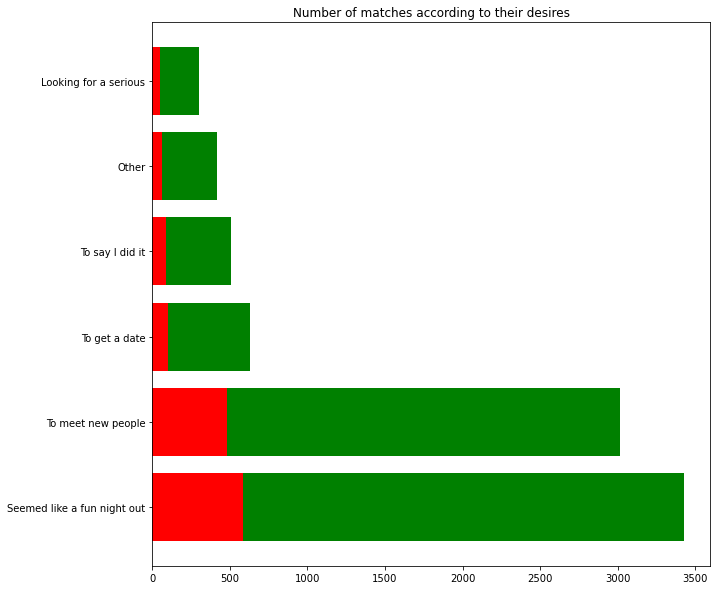

In [93]:
# Create the speed dating's crush Barplot
plt.figure(figsize = (10,10))
plt.title("Number of matches according to their desires")
plt.barh(names, values_2, color='red')
plt.barh(names, values_3 , left=values_2, color='green')
plt.show()

#### Nous pouvons voir grace au graphique ci-dessus, que trop peu de personnes souhaitant un type relation, arrivaient à l'obtenir. Trop peu de personnes souhaitaient quelque chose de sérieux (c'est normal, ceci étant une expérience auprès de jeunes étudiants, ça n'était pas un réel speed dating comme il en existe réellement). 

# 4. Leave the numerical values in the columns can be too complicated to understand the dataset. It would be better to change them into their right signification

In [94]:
# Input gender Female & Male
speed_dating['gender'] = speed_dating['gender'].apply(lambda x: 'Female' if x == 0 else 'Male' if x ==1 else x)

# Input gender the choice given per wave
speed_dating['choice'] = speed_dating['choice'].apply(lambda x: 'limited choice' if x == 1 else 'extensive choice')

# Input match Yes or No
speed_dating['match'] = speed_dating['match'].apply(lambda x: 'No' if x == 0 else 'Yes')

# Input equal race from partner
speed_dating['equal_race'] = speed_dating['equal_race'].apply(lambda x: 'No' if x == 0 else 'Yes')

# Input decision Yes or No
speed_dating['decision'] = speed_dating['decision'].apply(lambda x: 'No' if x == 0 else 'Yes')


# Input race of partner
speed_dating['race_partner'] = speed_dating['race_partner'].apply(lambda x: 'Black/African' if x == 1 
                                                else 'European/Caucasian' if x == 2 
                                                else 'Latino/Hispanic' if x == 3
                                                else 'Asian/Pacific/Islander' if x == 4
                                                else 'Native American' if x == 5
                                                else 'other' if x == 6
                                                else  x
                                                )

# Input race of partner
speed_dating['goal'] = speed_dating['goal'].apply(lambda x: 'Seemed like a fun night out' if x == 1 
                                                else 'To meet new people' if x == 2 
                                                else 'To get a date' if x == 3
                                                else 'Looking for a serious relationship' if x == 4
                                                else 'To say I did it' if x == 5
                                                else 'Other' if x == 6
                                                else  x
                                                )

# Input field of study from partner
speed_dating['field_of_study'] = speed_dating['field_of_study'].apply(lambda x: 'Law' if x == 1 
                                                    else 'Math' if x == 2 
                                                    else 'Social Science, Psychologist' if x == 3
                                                    else 'Medical Science, Pharmaceuticals' if x == 4
                                                    else 'Engineering' if x == 5
                                                    else 'Writing/Journalism' if x == 6
                                                    else 'History/Religion/Philosophy ' if x == 7
                                                    else 'Business/Econ/Finance' if x == 8
                                                    else 'Education,Academia' if x == 9
                                                    else 'Biological Sciences/Chemistry/Physics' if x == 10
                                                    else 'Social Work' if x == 11
                                                    else 'Undergrad/undecided' if x == 12
                                                    else 'Political Science/International Affairs' if x == 13
                                                    else 'Film' if x == 14
                                                    else 'Fine Arts/Arts Administration' if x == 15
                                                    else 'Languages' if x == 16
                                                    else 'Architecture' if x == 17
                                                    else 'other' if x == 18
                                                    else  x 
                                                   
                                                   )


# Input race of candidate
speed_dating['race_candidate'] = speed_dating['race_candidate'].apply(lambda x: 'Black/African' if x == 1 
                                                else 'European/Caucasian' if x == 2 
                                                else 'Latino/Hispanic' if x == 3
                                                else 'Asian/Pacific/Islander' if x == 4
                                                else 'Native American' if x == 5
                                                else 'other' if x == 6
                                                else  x
                                                )

# Input date frequency 
speed_dating['date_frequence'] = speed_dating['date_frequence'].apply(lambda x: 'Several times a week' if x == 1 
                                                else 'Twice a week' if x == 2 
                                                else 'Once a week' if x == 3
                                                else 'Twice a month' if x == 4
                                                else 'Once a month' if x == 5
                                                else 'Several times a year' if x == 6  
                                                else  'Almost never' if x == 7
                                                else x
                                                )

# Input go out frequency 
speed_dating['go_out_frequence'] = speed_dating['go_out_frequence'].apply(lambda x: 'Several times a week' if x == 1 
                                                else 'Twice a week' if x == 2 
                                                else 'Once a week' if x == 3
                                                else 'Twice a month' if x == 4
                                                else 'Once a month' if x == 5
                                                else 'Several times a year' if x == 6  
                                                else  'Almost never' if x == 7
                                                else x
                                                )

# Input field of study from candidate
speed_dating['career_candidate'] = speed_dating['career_candidate'].apply(lambda x: 'Law' if x == 1 
                                                    else 'Math' if x == 2 
                                                    else 'Social Science, Psychologist' if x == 3
                                                    else 'Medical Science, Pharmaceuticals' if x == 4
                                                    else 'Engineering' if x == 5
                                                    else 'Writing/Journalism' if x == 6
                                                    else 'History/Religion/Philosophy ' if x == 7
                                                    else 'Business/Econ/Finance' if x == 8
                                                    else 'Education,Academia' if x == 9
                                                    else 'Biological Sciences/Chemistry/Physics' if x == 10
                                                    else 'Social Work' if x == 11
                                                    else 'Undergrad/undecided' if x == 12
                                                    else 'Political Science/International Affairs' if x == 13
                                                    else 'Film' if x == 14
                                                    else 'Fine Arts/Arts Administration' if x == 15
                                                    else 'Languages' if x == 16
                                                    else 'Architecture' if x == 17
                                                    else 'other' if x == 18
                                                    else  x   
                                                   )
speed_dating

,candidate_id,gender,choice,wave,candidates_wave,partner_id,goal,match,canidates_correl,equal_race,age_partner,race_partner,age_candidate,field_of_study,race_candidate,race_importance,religion_importance,city,income,date_frequence,go_out_frequence,career_candidate,decision,nbr_dates,callback_to_match,callback_from_match,dateafter_callmatch,lookfor_attractive,lookfor_sincere,lookfor_intelligent,lookfor_fun,lookfor_ambitious,lookfor_sharedint,ownattributes_attractive,ownattributes_sincere,ownattributes_intelligent,ownattributes_fun,ownattributes_ambitious
0,1,Female,limited choice,1,10,11.0,To meet new people,No,0.14,No,27.0,European/Caucasian,21.0,Law,Asian/Pacific/Islander,2.0,4.0,Chicago,"69,487.00",Almost never,Several times a week,NaN,Yes,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
1,1,Female,limited choice,1,10,12.0,To meet new people,No,0.54,No,22.0,European/Caucasian,21.0,Law,Asian/Pacific/Islander,2.0,4.0,Chicago,"69,487.00",Almost never,Several times a week,NaN,Yes,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
2,1,Female,limited choice,1,10,13.0,To meet new people,Yes,0.16,Yes,22.0,Asian/Pacific/Islander,21.0,Law,Asian/Pacific/Islander,2.0,4.0,Chicago,"69,487.00",Almost never,Several times a week,NaN,Yes,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
3,1,Female,limited choice,1,10,14.0,To meet new people,Yes,0.61,No,23.0,European/Caucasian,21.0,Law,Asian/Pacific/Islander,2.0,4.0,Chicago,"69,487.00",Almost never,Several times a week,NaN,Yes,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
4,1,Female,limited choice,1,10,15.0,To meet new people,Yes,0.21,No,24.0,Latino/Hispanic,21.0,Law,Asian/Pacific/Islander,2.0,4.0,Chicago,"69,487.00",Almost never,Several times a week,NaN,Yes,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,Male,extensive choice,21,22,526.0,Seemed like a fun night out,No,0.64,No,26.0,Latino/Hispanic,25.0,other,European/Caucasian,1.0,1.0,France,NaN,Twice a week,Several times a week,Fine Arts/Arts Administration,No,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0
8374,552,Male,extensive choice,21,22,527.0,Seemed like a fun night out,No,0.71,No,24.0,other,25.0,other,European/Caucasian,1.0,1.0,France,NaN,Twice a week,Several times a week,Fine Arts/Arts Administration,No,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0
8375,552,Male,extensive choice,21,22,528.0,Seemed like a fun night out,No,-0.46,No,29.0,Latino/Hispanic,25.0,other,European/Caucasian,1.0,1.0,France,NaN,Twice a week,Several times a week,Fine Arts/Arts Administration,No,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0
8376,552,Male,extensive choice,21,22,529.0,Seemed like a fun night out,No,0.62,No,22.0,Asian/Pacific/Islander,25.0,other,European/Caucasian,1.0,1.0,France,NaN,Twice a week,Several times a week,Fine Arts/Arts Administration,No,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0


In [95]:
id_selection = speed_dating['candidate_id'].nunique()
print('The dataset shows that {} candidates have been part of the speed dating session.'.format(id_selection))

#Count the number of Male & Female
male_female = speed_dating.groupby(['gender'])['candidate_id'].nunique()

nbr_female = male_female[0]
nbr_male = male_female[1]

print('Now we know there are {} candidates, {} are Women and {} are Men.'.format(id_selection,nbr_female,nbr_male))
print(' ')

The dataset shows that 551 candidates have been part of the speed dating session.
Now we know there are 551 candidates, 274 are Women and 277 are Men.
 


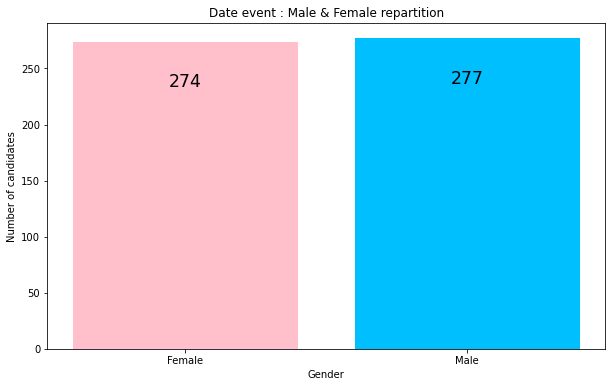

In [96]:
# Declaring indexes and values
gender_values = male_female.values
gender = male_female.index

# Male & Female repartition
plt.figure(figsize = (10, 6))

plt.text(gender[0],gender_values[0]*0.9, np.round(gender_values[0],2), ha = "center", va = "top", size='xx-large')
plt.text(gender[1],gender_values[1]*0.9, np.round(gender_values[1],2), ha = "center", va = "top", size='xx-large')

plt.bar(gender, gender_values, color=['pink', 'deepskyblue'])
plt.title("Date event : Male & Female repartition")
plt.xlabel("Gender")
plt.ylabel("Number of candidates")
plt.show()

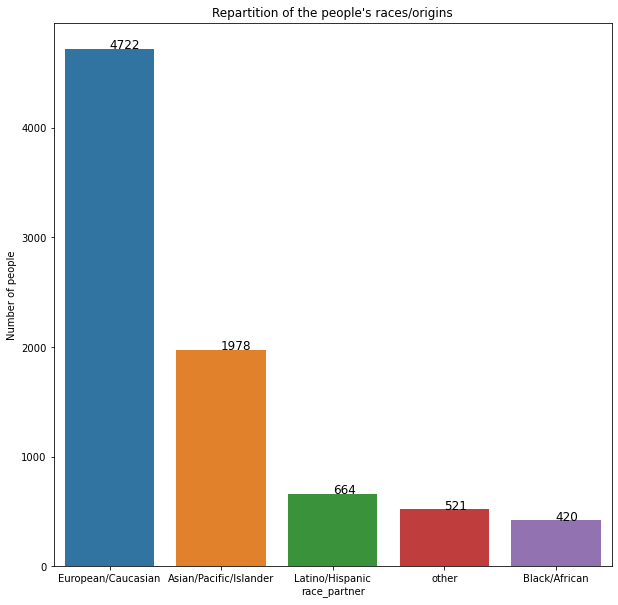

In [97]:
plt.figure(figsize=(10,10))

plt.subplot() 
ax = sns.countplot(x = speed_dating["race_partner"], 
                    order = ["European/Caucasian", "Asian/Pacific/Islander", "Latino/Hispanic", "other", "Black/African"]);
ax.set_ylabel("Number of people")
ax.set_title("Repartition of the people's races/origins")
for i in ax.patches: #loop to print value of people on top of the bars
    ax.text(i.get_x() +0.40, i.get_height()+0.08,str(round((i.get_height()), 1)),fontsize = 12)

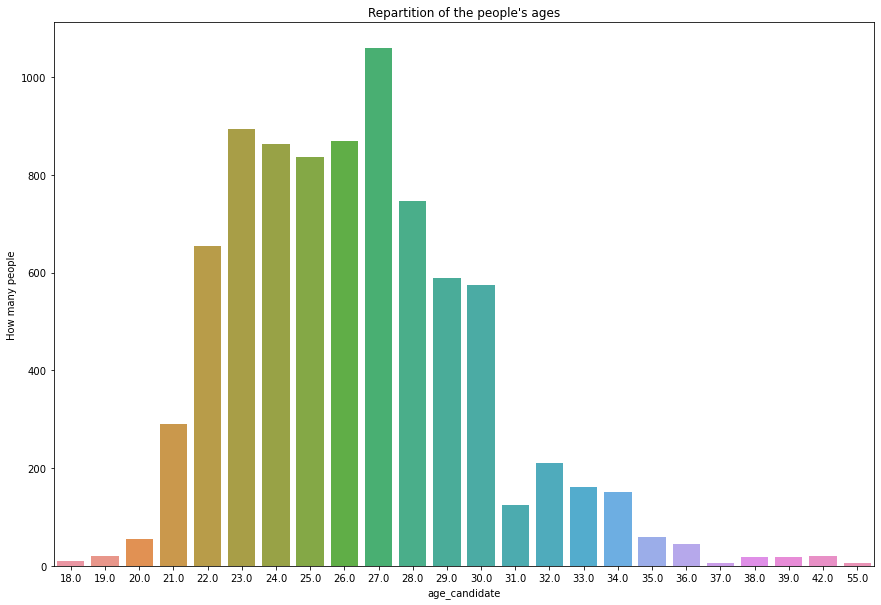

In [98]:
plt.figure(figsize=(50,10))

# Second chart : age 
plt.subplot(132)
ax2 = sns.countplot(x = speed_dating["age_candidate"]);
ax2.set_ylabel("How many people")
ax2.set_title("Repartition of the people's ages")

plt.show();

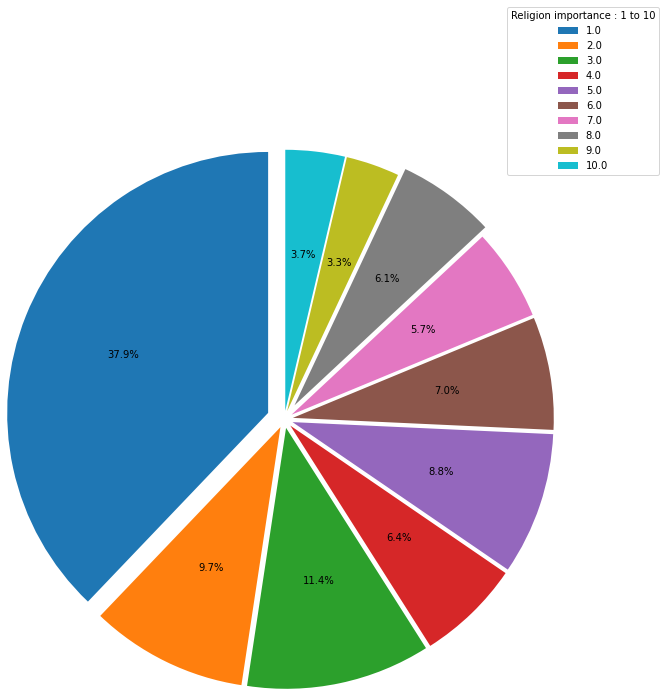

In [99]:
# Results of candidates for whom religion matters
race_c = speed_dating.groupby(['religion_importance'])['candidate_id'].nunique()

plt.figure(figsize = (10, 8))
plt.pie(
    race_c, 
    autopct = '%1.1f%%',
    shadow = False, 
    startangle = 90,
    explode = (0.1, 0.05, 0.05,0.05,0.05,0.05,0.05,0.1,0.05, 0.05),
    radius = 1.5 
       )

plt.legend(race_c.index, title = 'Religion importance : 1 to 10', bbox_to_anchor=(1.0, 1.05))

plt.show()

The tabs with the importance of religions for everybody:


Not important     0.728401
Important         0.198217
Very important    0.073382
Name: religion_importance, dtype: float64

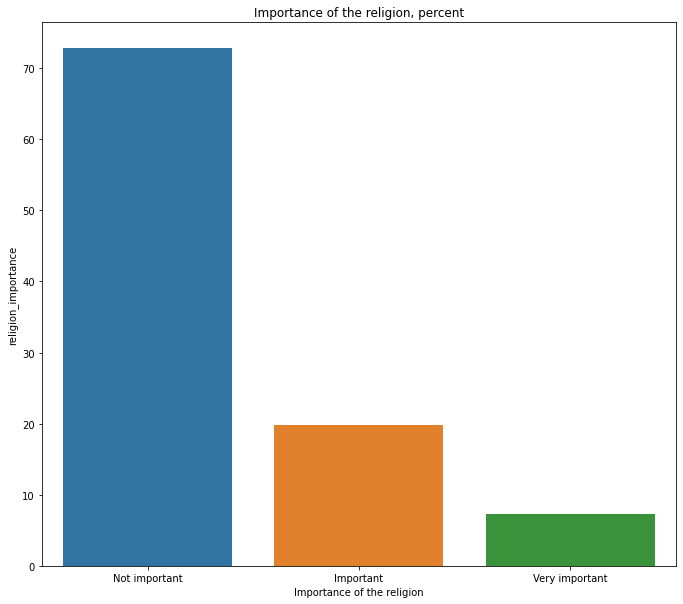

In [100]:
plt.figure(figsize = (25, 10))

# Convert religious rating into importance
speed_dating['religion_importance'] = speed_dating.religion_importance.map({0: 'Not important', 1.0: 'Not important', 2.0: 'Not important', 3.0: 'Not important', 4.0: 'Not important', 5.0: 'Not important', 6.0: 'Important', 7.0: 'Important', 8.0: 'Important', 9.0: 'Very important', 10.0: 'Very important'})

print("The tabs with the importance of religions for everybody:")
display(speed_dating["religion_importance"].value_counts(normalize = True) )

# Another vision about the religious importance
plt.subplot(122)
rel = speed_dating["religion_importance"].value_counts(normalize=True).mul(100)
ax3 = sns.barplot(x = speed_dating["religion_importance"].value_counts().index, 
                    y = rel, 
                    order=["Not important","Important","Very important"]);
ax3.set(title = 'Importance of the religion, percent', xlabel = 'Importance of the religion')

plt.show();

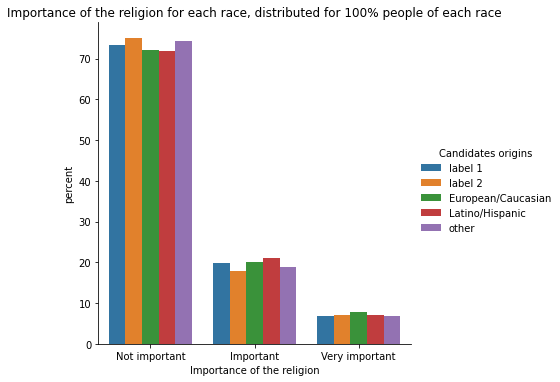

In [101]:
# Let see for which origin the religion is important
rel2 = speed_dating.groupby("race_partner")['religion_importance'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax4 = sns.catplot( x="religion_importance",
                    y='percent',
                    data = rel2, 
                    hue="race_partner",
                    kind='bar');

# Legend title
new_title = 'Candidates origins'
ax4._legend.set_title(new_title)

# replace labels
new_labels = ['label 1', 'label 2']
for t, l in zip(ax4._legend.texts, new_labels):
    t.set_text(l)

ax4.set(title = "Importance of the religion for each race, distributed for 100% people of each race",
        xlabel = "Importance of the religion")

## Nous pouvons voir d'après les graphs ci-dessus, que près de 2/3 des candidats ne prêtent pas attention à la religion sur leur crush (cette statistique ne concerne que les notes allant de 1 à 4, en prenant en compte la note de 5 également, nous arrivons à presque 75%).

## Peu importe l'origine des candidats, la religion n'est vraiment pas importante pour eux.



## Maintenant que nous avons vu comment les candidats considèrent le côté religieux pour un date, voyons s'ils comptent se revoir pour un second rendez-vous.

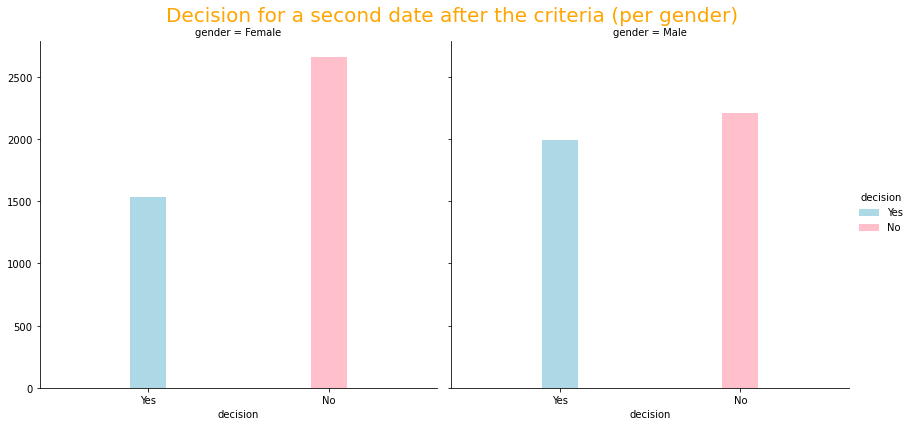

In [67]:
second = sns.FacetGrid(speed_dating, col='gender',height = 6,hue_kws={'color': ['lightblue','pink','y','g']}, hue="decision")
second.map(plt.hist, 'decision', bins=5)
ax5 = second.axes.flatten()
plt.subplots_adjust(top=0.9)
second.fig.suptitle("Decision for a second date after the criteria (per gender)", fontsize=20, color='orange')
second.add_legend();

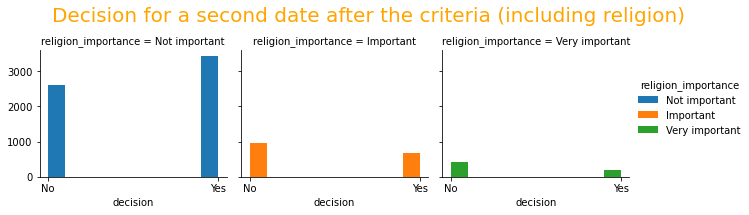

In [127]:
second1 = sns.FacetGrid(speed_dating ,col='religion_importance', hue="religion_importance")
second1.map(plt.hist, 'decision', bins=10)
ax6 = second1.axes.flatten()
plt.subplots_adjust(top=0.78)
second1.fig.suptitle("Decision for a second date after the criteria (including religion)", fontsize=20, color = 'orange')
second1.add_legend();

### Nous pouvons voir une fois de plus, que la religion n'est absolument pas un soucis pour une majorité des candidats concernant un second date. Il n'y a aucun changement par rapport aux résultats précédents.

## Cependant, pour ceux à qui la religion est un sujet important, on voit bien qu'ils sont plus plus perplexes à revoir leur crush.

# Conclusion

### We can conclude for instance that candidates in general, are not interested about the religion, except people that this topic is important, but those people are minorities. 

### We can at the same time, see that women are more septic concerning a new date compare the guys.